In [8]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [9]:
data = pd.read_csv("/Users/onatkeskin/Desktop/train.csv")
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [10]:
data = data.drop(columns=['id', 'timestamp','country'])

In [11]:
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [12]:
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [14]:
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


In [16]:
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [19]:
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [20]:
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [21]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [22]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [23]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [24]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


In [25]:
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [26]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [27]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
18,2.789771,0,-2.213035,-0.629532,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
412,-0.013444,0,0.023905,-0.629532,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3325,-0.244259,0,2.382526,0.571149,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2288,2.789771,1,-0.489699,-0.629532,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3616,0.261412,0,-0.489699,-0.629532,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,1.121205,1,0.296474,-0.629532,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1945,0.182017,1,-0.209315,-0.629532,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2396,-0.244259,0,2.382526,-0.029192,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2493,-0.217350,0,-0.091789,-0.629532,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [28]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
reg.coef_

array([ 2.05288009e+02,  5.26935581e+01,  1.53561220e+02,  2.11485684e+02,
        5.09556433e+01, -9.83582635e+01,  1.81591916e+02, -2.14075438e+03,
        1.08920506e+03,  7.47513382e+02,  5.77704720e+02,  4.80084784e+02,
        8.97279128e+02,  6.78351195e+02, -3.65401453e+01,  8.39095666e+02,
       -1.13686838e-13,  1.13686838e-12,  3.34009442e+02, -2.73388254e+02,
        1.76078138e+02,  2.75563030e+02, -3.95419947e+02, -1.83351476e+02])

In [30]:
reg.intercept_

6279.961682043679

In [31]:
mean_absolute_error(y_train,reg.predict(X_train))

857.0542357198694

In [32]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1218.158030644412

In [33]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

871.2070082150798 1216.4182657703489


In [34]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,-0.005183,0.234558,0.007611,-0.031069,0.518374,0.035966,0.006255,0.0,0.079750,0.513683,0.003909,0.237686,0.035966,0.055512,0.020328,0.0,0.000782,0.000782,0.548084,0.007037,0.175137,0.148554,0.147772,0.560594
std,1.023193,0.423888,1.025278,0.967318,0.499858,0.186277,0.078871,0.0,0.271011,0.500008,0.062427,0.425832,0.186277,0.229067,0.141176,0.0,0.027962,0.027962,0.497877,0.083622,0.380233,0.355787,0.355012,0.496509
min,-2.266946,0.000000,-2.213035,-0.629532,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.547342,0.000000,-0.489699,-0.629532,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.079790,0.000000,-0.489699,-0.629532,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.261412,0.000000,0.150311,-0.029192,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.789771,1.000000,2.382526,2.372169,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


871.3558883692971 1216.7427364028283


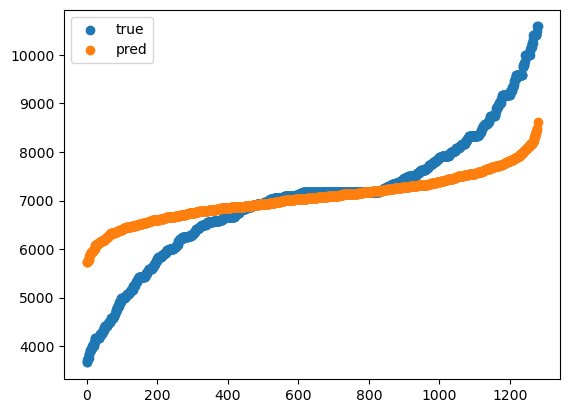

In [35]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [36]:
ridge.coef_

array([  206.03172843,    55.11759784,   152.63116522,   210.49689103,
          52.89264675,   -96.36167972,   164.72202839, -1078.40466051,
        1058.27631987,   721.12229516,   516.50768552,   453.67689538,
         865.43373295,   647.0766959 ,   -60.60444457,   405.4991397 ,
           0.        ,     0.        ,   332.39021299,  -259.90892754,
         174.98198729,   270.15756083,  -388.47083156,  -180.01365736])

871.2860310143756 1217.2551514328093


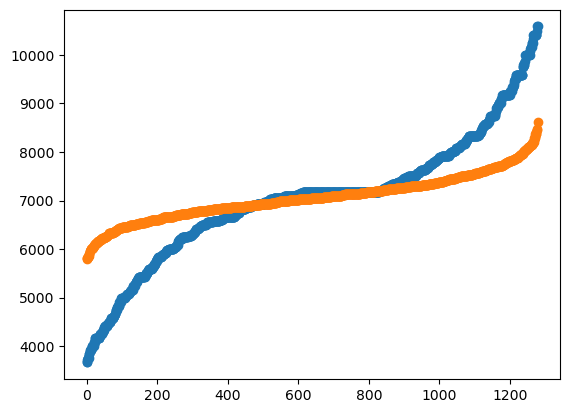

In [37]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [38]:
lasso.coef_

array([ 206.33719893,   54.97535839,  150.82570233,  208.5543203 ,
         51.17170489,  -71.22703433,    0.        ,   -0.        ,
        975.93148272,  647.17923556,  273.32333142,  376.4910337 ,
        779.28740167,  563.53470307,  -64.04777467,    0.        ,
          0.        ,    0.        ,  317.49898013, -134.13967134,
        158.61936055,  219.40567136, -340.39379636, -165.38858083])

In [39]:
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

mean_absolute_error(y_train,decisiontree.predict(X_train))

623.8771057558638

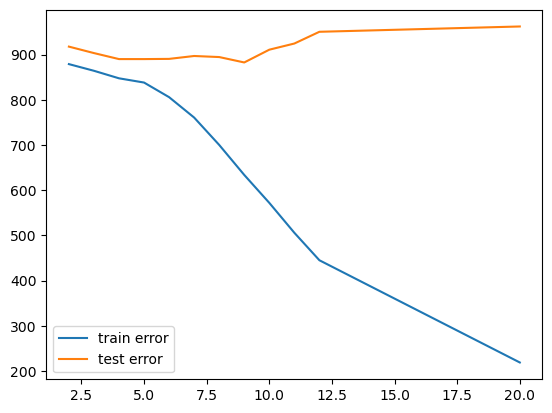

In [40]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [41]:
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

394.9967474423933

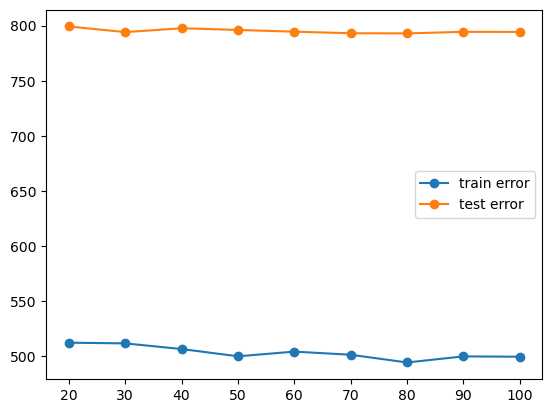

In [42]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

In [44]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)

,feature,importance
0,job_years,25.674294
2,hours_per_week,16.202470
3,telecommute_days_per_week,9.439246
4,certifications,7.043610
23,is_education_computer_related_Yes,6.147087
1,is_manager,4.908808
18,education_Bachelors (4 years),4.417338
9,job_title_DBA,4.209985
11,job_title_Developer,3.974087
20,education_Masters,3.731031
